In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_plot(title='', x_label='', y_label='', z_label='', x_lim=(0, 0), y_lim=(0,0), z_lim=(0,0), 
              grid=True, size=(9, 6), dpi=115, three_d=False):
    '''
    Generates a plot object
    
    Parameters:
        title - (string) title of the plot
        x - (float) a list of values for omega/omega_0
        y - (float) a list of values for the amplitude
        xlim - (float) the limit for the x axis, this is a list containing 2 variables, 
                    the max and min value of x
        ylim - (float) the limit for the y axis, this is a list containing 2 variables, 
                    the max and min value of y
        size - (int) resizing the figure of the plot
        dpi - (int) increasing the quality of the image produced
    Returns:
        plot - (object) the plot
    '''
    fig = plt.figure(figsize=(size[0], size[1]), dpi=dpi)
    plot = fig.add_subplot(111) if not three_d else fig.add_subplot(111, projection='3d')
    
    plot.set_title(title)
    if y_lim[0] != 0 and y_lim[1] !=0: plot.set_ylim(y_lim[0], y_lim[1])
    if x_lim[0] != 0 and x_lim[1] !=0: plot.set_xlim(x_lim[0], x_lim[1])
    if z_lim[0] != 0 and z_lim[1] !=0: plot.set_zlim(z_lim[0], z_lim[1])
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    if three_d: plot.set_zlabel(z_label)
    if grid: plt.grid()
    
    return plot

In [3]:
def auto_correlation(x):
    '''
    Finds the auto correlation of a digital signal
    
    https://dsp.stackexchange.com/questions/31894/where-does-the-delta-function-come-from-if-we-derive-autocorrelation-directly
    http://nptel.ac.in/courses/Webcourse-contents/IIT-%20Guwahati/probability_rp/module_04_random_processes/NPT38_WN.doc
    '''
    return [np.mean(x*np.roll(x, k)) for k in range(len(x))]

def PSD(signal=None, AC=None):
    '''
    Power spectral density function (PSD) 
    
    Fourier transform of the auto-correlation function.
    
    '''
    if (AC is None) & (signal is None):
        print("PEBCAK Error: Must input at least one of signal or AC.")
        return []
    elif AC is None:
        AC = auto_correlation(x)
    
    return np.fft.fft(AC)

In [20]:
def uniform_white_noise(mean, interval, npoints=8192):
    '''
    Function to generate uniformly distributed white noise
    '''
    return mean + np.random.uniform(-interval/2, interval/2, npoints)

def gaussian_white_noise(mean, sigma, npoints=8192):
    '''
    Function to generate gaussian white noise
    '''
    return np.random.normal(mean, sigma, npoints)

def delta(k, npoints=8192):
    signal = np.zeros(npoints)
    signal[k] += 1
    return signal

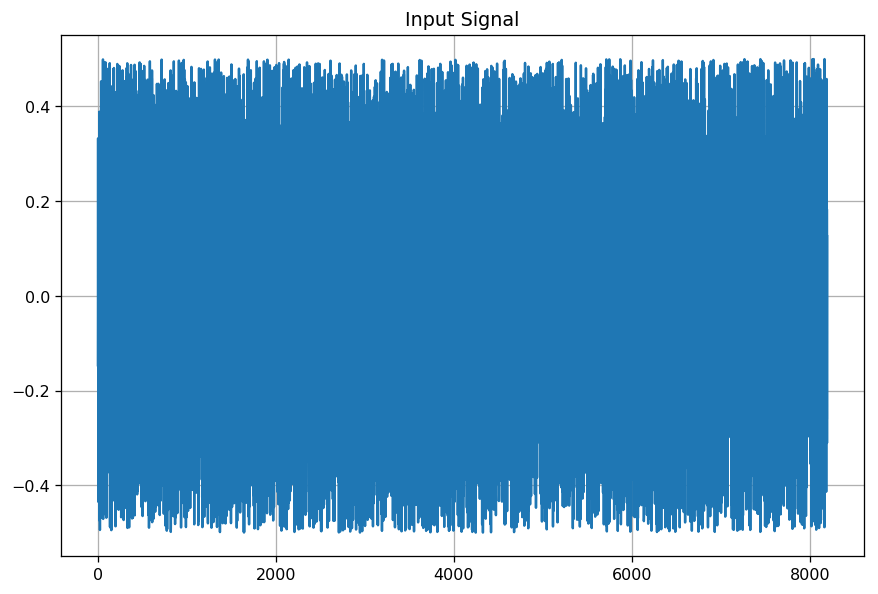

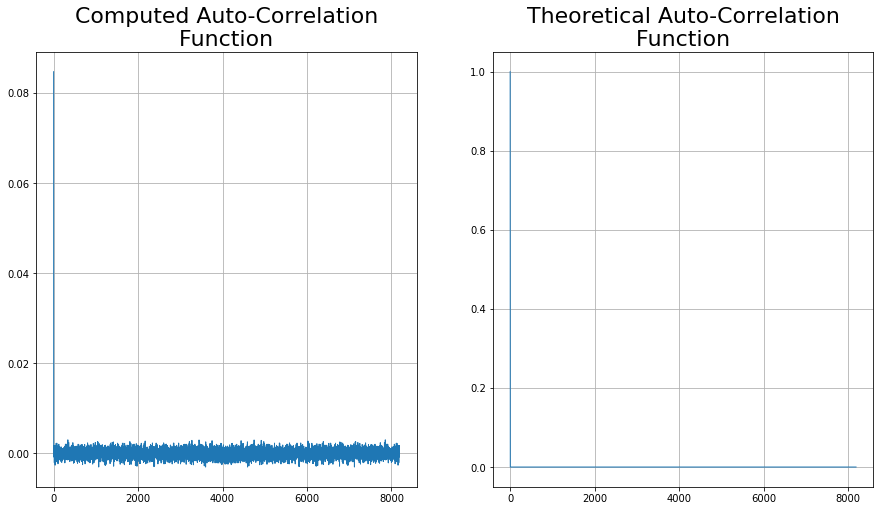

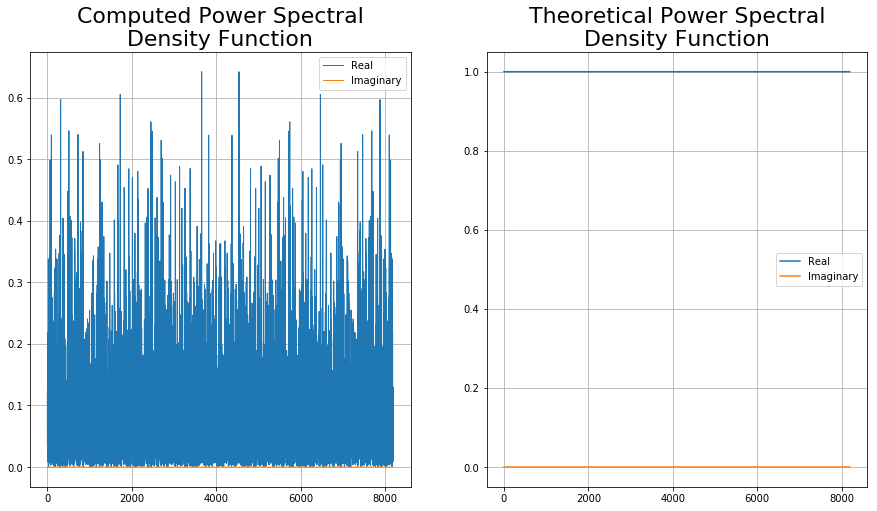

In [21]:
uniform_signal = uniform_white_noise(0, 1)
AC_u = auto_correlation(uniform_signal)
S_u = PSD(AC=AC_u)
S_u_theo = PSD(AC=delta(0))

#****************Plotting****************
font_size=22

make_plot('Input Signal').plot(uniform_signal)

# Auto-correlation function
f,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(AC_u, linewidth=1)
ax[0].set_title('Computed Auto-Correlation\nFunction', fontsize=font_size)
ax[0].grid('on')
ax[1].plot(delta(0), linewidth=1)
ax[1].set_title('Theoretical Auto-Correlation\nFunction', fontsize=font_size)
ax[1].grid('on')

# PSD
f,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(S_u.real, label="Real", linewidth=1)
ax[0].plot(S_u.imag, label="Imaginary", linewidth=1)
ax[0].set_title('Computed Power Spectral\nDensity Function', fontsize=font_size)
ax[0].grid('on')
ax[0].legend()
ax[1].plot(S_u_theo.real, label="Real")
ax[1].plot(S_u_theo.imag, label="Imaginary")
ax[1].set_title('Theoretical Power Spectral\nDensity Function', fontsize=font_size)
ax[1].grid('on')
ax[1].legend();

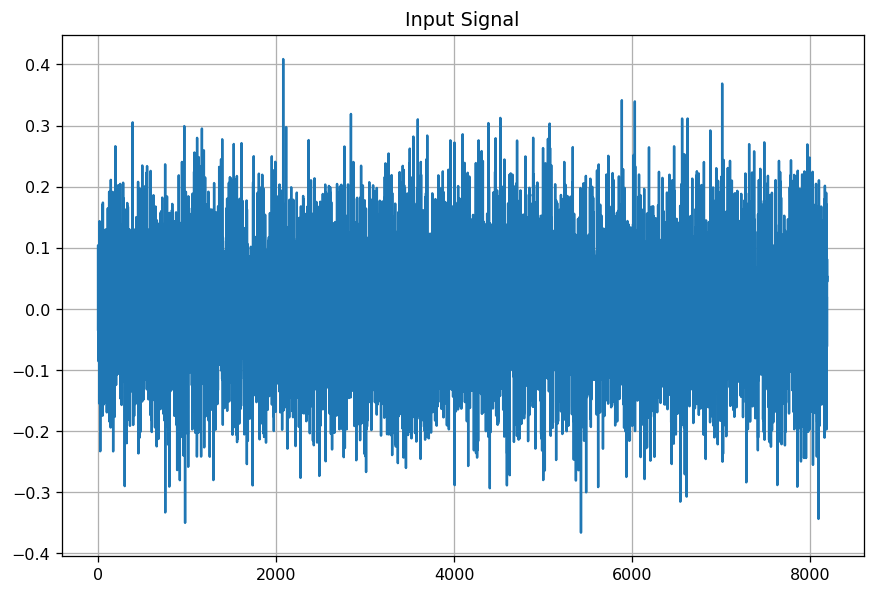

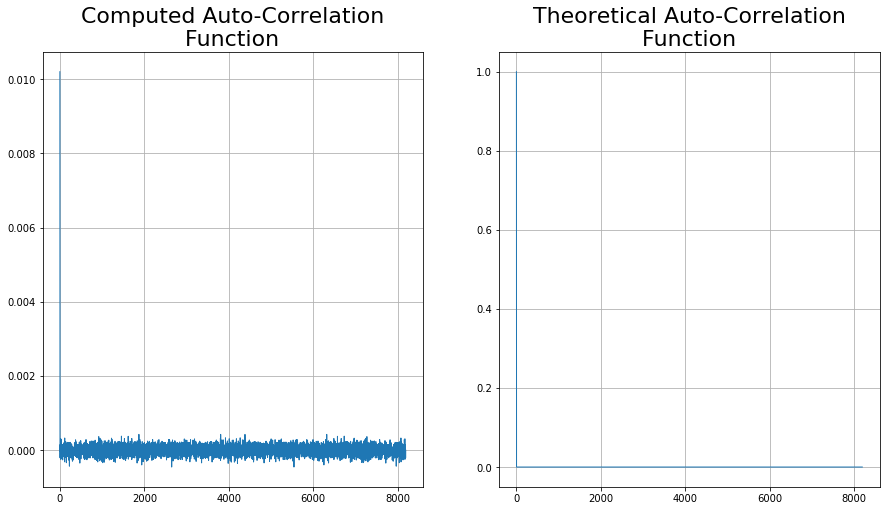

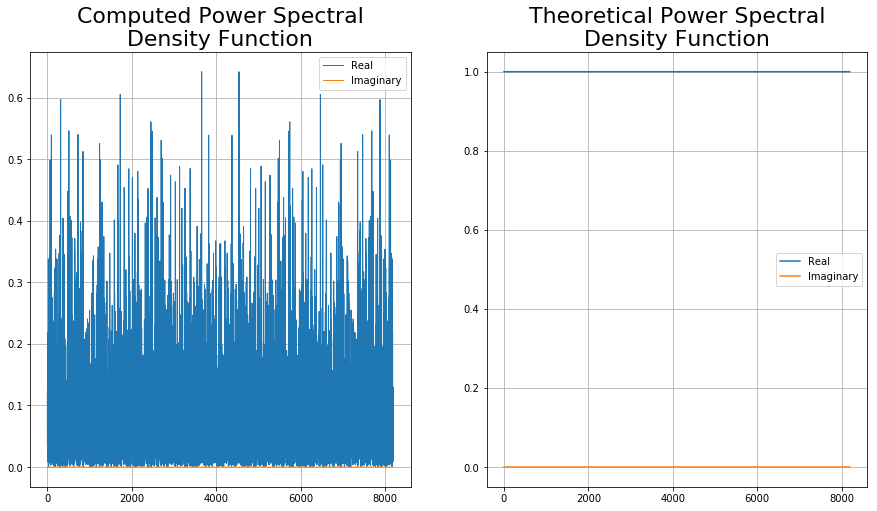

In [22]:
gaussian_signal = gaussian_white_noise(0, 0.1)
AC_g = auto_correlation(gaussian_signal)
S_g = PSD(AC=AC_u)
S_g_theo = PSD(AC=delta(0))

#****************Plotting****************
font_size=22

make_plot('Input Signal').plot(gaussian_signal)

# Auto-correlation function
f,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(AC_g, linewidth=1)
ax[0].set_title('Computed Auto-Correlation\nFunction', fontsize=font_size)
ax[0].grid('on')
ax[1].plot(delta(0), linewidth=1)
ax[1].set_title('Theoretical Auto-Correlation\nFunction', fontsize=font_size)
ax[1].grid('on')

# PSD
f,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(S_g.real, label="Real", linewidth=1)
ax[0].plot(S_g.imag, label="Imaginary", linewidth=1)
ax[0].set_title('Computed Power Spectral\nDensity Function', fontsize=font_size)
ax[0].grid('on')
ax[0].legend()
ax[1].plot(S_g_theo.real, label="Real")
ax[1].plot(S_g_theo.imag, label="Imaginary")
ax[1].set_title('Theoretical Power Spectral\nDensity Function', fontsize=font_size)
ax[1].grid('on')
ax[1].legend();